In [1]:
from sys import maxsize #para imprimir arrays completos
import numpy as np
import pandas as pd
import re as regex
import math as math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
pathArchivoDataSet = 'abalonedb.csv' 
abalone = pd.read_csv(pathArchivoDataSet)

In [7]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sex      4177 non-null   object 
 1   Length   4177 non-null   float64
 2   Diam     4177 non-null   float64
 3   Height   4177 non-null   float64
 4   Whole    4177 non-null   float64
 5   Shucked  4177 non-null   float64
 6   Viscera  4177 non-null   float64
 7   Shell    4177 non-null   float64
 8   Rings    4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
abalone.isna().sum()

Sex        0
Length     0
Diam       0
Height     0
Whole      0
Shucked    0
Viscera    0
Shell      0
Rings      0
dtype: int64

In [9]:
abalone.sample(10)

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
1932,F,0.620,0.495,0.170,1.0620,0.3720,0.2130,0.3400,11
3234,F,0.590,0.485,0.205,1.2315,0.4525,0.2380,0.4200,13
1985,M,0.760,0.605,0.215,2.1730,0.8010,0.4915,0.6460,13
2301,F,0.520,0.425,0.150,0.8130,0.3850,0.2015,0.2300,10
2680,M,0.615,0.475,0.175,1.1030,0.4635,0.3095,0.2725,10
1732,M,0.665,0.520,0.175,1.3725,0.6060,0.3200,0.3950,12
3610,M,0.580,0.450,0.160,0.8675,0.3935,0.2210,0.2150,9
3000,M,0.640,0.485,0.160,1.0060,0.4560,0.2245,0.2835,9
28,M,0.605,0.475,0.180,0.9365,0.3940,0.2190,0.2950,15
899,I,0.295,0.230,0.080,0.1625,0.0650,0.0500,0.0385,5


In [10]:
abalone.columns

Index(['Sex', 'Length', 'Diam', 'Height', 'Whole', 'Shucked', 'Viscera',
       'Shell', 'Rings'],
      dtype='object')

In [12]:
def getInfoByColumn(df):
    
    for column in df:
        
        InfoBasica = df[column].describe()
        
        uniqueValuesCount = len(df[column].unique())
        
        if (uniqueValuesCount < 10):
            
            ShowUnique = 'Show Unique  ' + str(df[column].unique()).strip('[]')
        else:
            ShowUnique = 'Show Unique  ' + str(df[column].unique()[0:30]).strip('[]') + ',etc...'
        
        print('Información columna: {} \n''---------------\n{}'.format(column, InfoBasica))
        print('{}''\n'.format(ShowUnique))

In [13]:
getInfoByColumn(abalone)

Información columna: Sex 
---------------
count     4177
unique       3
top          M
freq      1528
Name: Sex, dtype: object
Show Unique  'M' 'F' 'I'

Información columna: Length 
---------------
count    4177.000000
mean        0.523992
std         0.120093
min         0.075000
25%         0.450000
50%         0.545000
75%         0.615000
max         0.815000
Name: Length, dtype: float64
Show Unique  0.455 0.35  0.53  0.44  0.33  0.425 0.545 0.475 0.55  0.525 0.43  0.49
 0.535 0.47  0.5   0.355 0.365 0.45  0.38  0.565 0.615 0.56  0.58  0.59
 0.605 0.575 0.68  0.665 0.705 0.465,etc...

Información columna: Diam 
---------------
count    4177.000000
mean        0.407881
std         0.099240
min         0.055000
25%         0.350000
50%         0.425000
75%         0.480000
max         0.650000
Name: Diam, dtype: float64
Show Unique  0.365 0.265 0.42  0.255 0.3   0.415 0.425 0.37  0.44  0.38  0.35  0.405
 0.355 0.4   0.28  0.34  0.295 0.32  0.275 0.48  0.45  0.445 0.475 0.47
 0.56  0.

In [15]:
#Funión para graficar un histograma por cada columna del dataset
def getHistogramByColumn(df):
    for column in df:

        #Gráfica Histograma:
        Histograma = df[column].hist(grid=False, color='indigo', bins=10, xlabelsize=10, xrot=45)
        
        #Título y nombre de ejes: 
        plt.xlabel(column, fontsize= 13, color='green')
        plt.ylabel('Freq.',fontsize= 13, color='green')
        plt.title('Columna: ' + column, fontsize= 20, color='mediumslateblue')
        
        plt.legend(labels=df[column],  loc='upper right', fontsize='small',bbox_to_anchor=(1.3, 1))
        plt.show()
        print (Histograma)

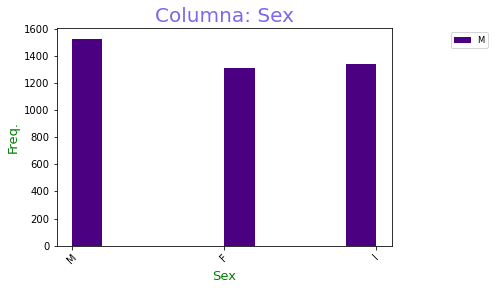

AxesSubplot(0.125,0.125;0.775x0.755)


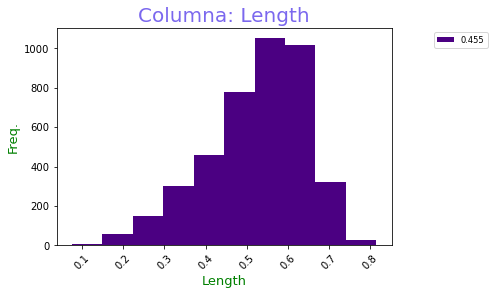

AxesSubplot(0.125,0.125;0.775x0.755)


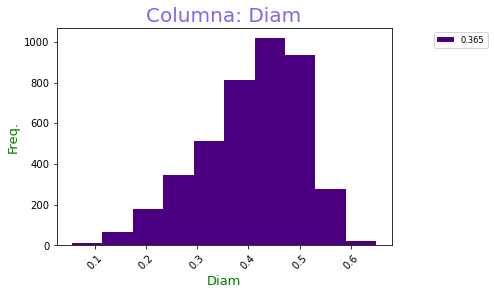

AxesSubplot(0.125,0.125;0.775x0.755)


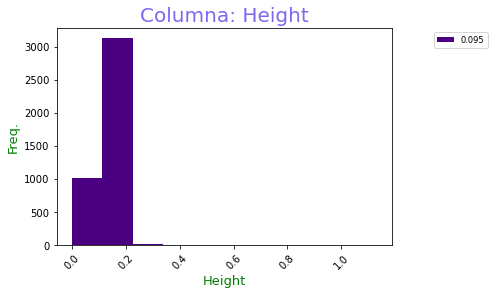

AxesSubplot(0.125,0.125;0.775x0.755)


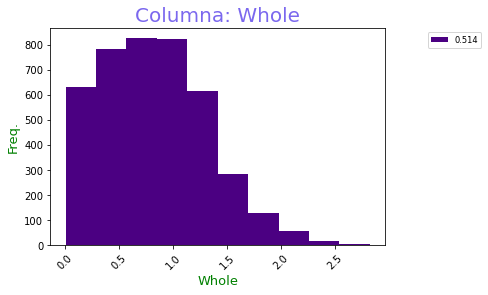

AxesSubplot(0.125,0.125;0.775x0.755)


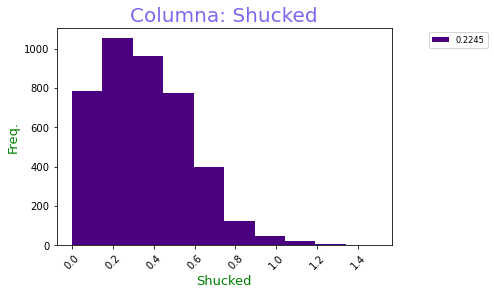

AxesSubplot(0.125,0.125;0.775x0.755)


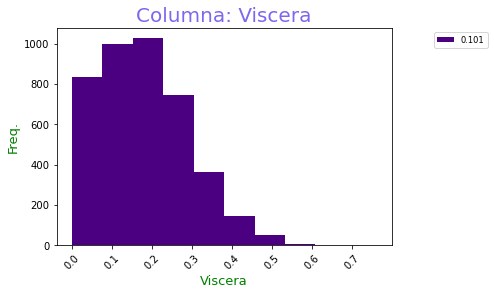

AxesSubplot(0.125,0.125;0.775x0.755)


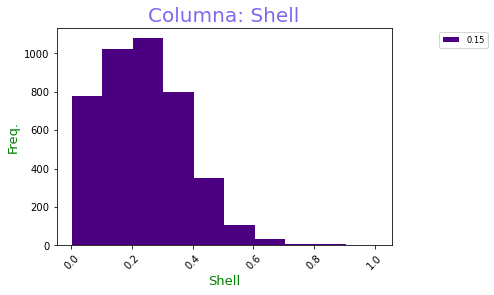

AxesSubplot(0.125,0.125;0.775x0.755)


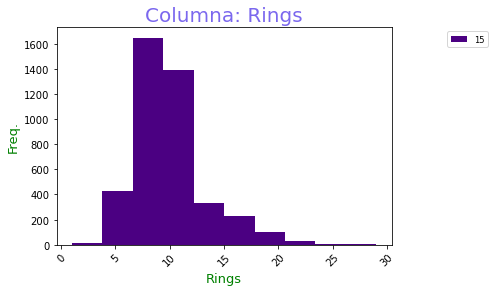

AxesSubplot(0.125,0.125;0.775x0.755)


In [16]:
getHistogramByColumn(abalone)

In [31]:
abalonedummies = pd.get_dummies(abalone)
abalonedummies

,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [33]:
def getStatisticForEachColumn(df):
    
    for column in df:
        
        STD = df[column].std()
        
        MEAN = df[column].mean()
        
        VAR =  df[column].var()
        
        print('Statistics mesures from:{}\n-----------------------------\nSTD:{}\nVAR: {}\nMean: {}\n'.format(column, STD, VAR, MEAN))

In [35]:
getStatisticForEachColumn(abalonedummies)

Statistics mesures from:Length
-----------------------------
STD:0.12009291256479998
VAR: 0.014422307648296695
Mean: 0.5239920995930099

Statistics mesures from:Diam
-----------------------------
STD:0.09923986613365918
VAR: 0.009848551030226593
Mean: 0.407881254488869

Statistics mesures from:Height
-----------------------------
STD:0.04182705660725703
VAR: 0.001749502664426684
Mean: 0.1395163993296614

Statistics mesures from:Whole
-----------------------------
STD:0.4903890182309973
VAR: 0.24048138920156137
Mean: 0.82874215944458

Statistics mesures from:Shucked
-----------------------------
STD:0.22196294903322014
VAR: 0.04926755074352388
Mean: 0.35936748862820106

Statistics mesures from:Viscera
-----------------------------
STD:0.10961425025968442
VAR: 0.012015283859992728
Mean: 0.18059360785252604

Statistics mesures from:Shell
-----------------------------
STD:0.13920266952238575
VAR: 0.019377383202158538
Mean: 0.23883085946851795

Statistics mesures from:Rings
----------------

In [17]:
# Cov(x,y) = (Sum(xi - x_mean) * Sum(yi - y_mean))/n

In [43]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

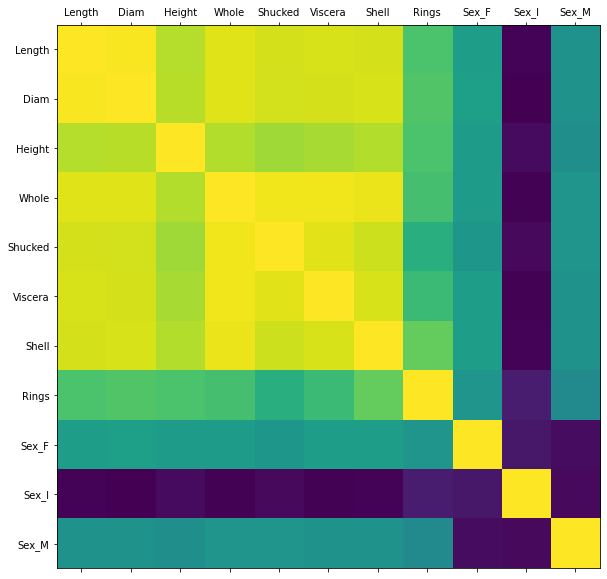

In [44]:
plot_corr(abalonedummies, size=10)